In [2]:
import os
import json
import numpy as np
import nibabel as nib
import matplotlib.pyplot as plt
from skimage import measure
import skimage.io as io


def getFileName1(path,suffix):
    # get files with suffix
    input_template_All=[]
    f_list = os.listdir(path)
    for i in f_list:
        if os.path.splitext(i)[1] ==suffix:
            input_template_All.append(i)
    return input_template_All

def get_imgs(fname):
    # .nii.gz files: split twice
    fname = os.path.splitext(fname)[0]
    fname = os.path.splitext(fname)[0]
    
    img_fname = os.path.join(imgs_path, fname + "_0000.nii.gz")
    lab_fname = os.path.join(labs_path, fname + ".nii.gz")
    pre_fname = os.path.join(preds_path, fname + ".nii.gz")
    
    img = nib.load(img_fname)
    lab = nib.load(lab_fname)
    pre = nib.load(pre_fname)

    img = img.get_fdata()
    lab = lab.get_fdata()
    pre = pre.get_fdata()
    return img, lab, pre

def detect_largest_ROI(lab):
    a = np.sum(lab, axis=0)
    b = np.sum(a, axis=0)
    
    return np.argmax(b)     
        

def img_standarize(img):
    window_center = 50.0
    window_width = 300.0
    
    win_min = (2*window_center - window_width)/2.0 + 0.5  
    win_max = (2*window_center + window_width)/2.0 + 0.5    
    dFactor = 255.0/(win_max - win_min)
    
    img_win = img
    img_win[img < win_min] = win_min
    img_win[img > win_max] = win_max
    img_win = (img_win - win_min)/(win_max - win_min)
    
    return img_win


### subfigures

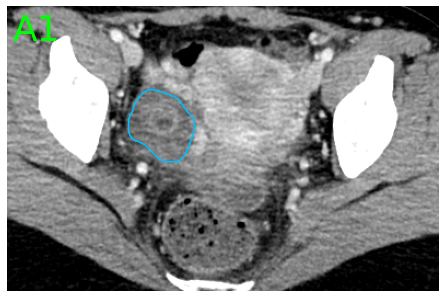

In [2]:
imgs_path = "/scratch/yiang/nnUNet/nnUNet_pred/Task102_CaOvarySeg_HK/imagesTs/"
labs_path = "/scratch/yiang/nnUNet/nnUNet_pred/Task102_CaOvarySeg_HK/labelsTs/"
preds_path = "/scratch/yiang/nnUNet/nnUNet_pred/Task102_CaOvarySeg_HK/op_3d_cascade/"

deltax = 170
deltay = 60
endx = 430
endy = 455

f, ax = plt.subplots()

[img, lab, pre] = get_imgs("DDR601.nii.gz")
slc_ind = 16; #detect_largest_ROI(lab)
lab_rot = np.rot90(lab[:, : ,slc_ind])
pre_rot = np.rot90(pre[:, : ,slc_ind])
contours_lab = measure.find_contours(lab_rot[deltax:endx, deltay:endy])
contours_pre = measure.find_contours(pre_rot[deltax:endx, deltay:endy])

img_tmp = np.rot90(img_standarize(img[:, :, slc_ind]))
img_tmp = img_tmp[deltax:endx, deltay:endy]
ax.imshow(img_tmp, cmap='gray')

for c1 in contours_lab:
    ax.plot(c1[:, 1], c1[:, 0], linewidth=1.5, color='red')
for c2 in contours_pre:
    ax.plot(c2[:, 1], c2[:, 0], linewidth=1.5, color='deepskyblue')
    
plt.axis('off')

plt.gca().set_axis_off()
plt.subplots_adjust(top = 1, bottom = 0, right = 1, left = 0, 
            hspace = 0, wspace = 0)
plt.margins(0,0)
plt.text(5, 30, "A1", size=36, color='lime')

save_path = "./Fig5/Fig5A1.tiff"
plt.savefig(save_path, dpi=400, bbox_inches='tight', pad_inches = 0)

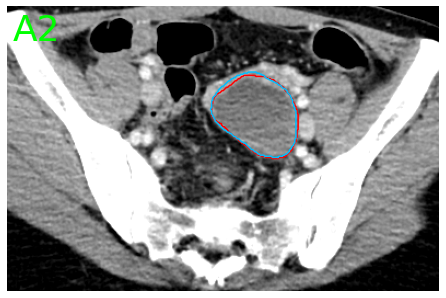

In [3]:
imgs_path = "/scratch/yiang/nnUNet/nnUNet_pred/Task102_CaOvarySeg_HK/imagesTs/"
labs_path = "/scratch/yiang/nnUNet/nnUNet_pred/Task102_CaOvarySeg_HK/labelsTs/"
preds_path = "/scratch/yiang/nnUNet/nnUNet_pred/Task102_CaOvarySeg_HK/op_3d_cascade/"

deltax = 170
deltay = 60
endx = 430
endy = 455

f, ax = plt.subplots()

[img, lab, pre] = get_imgs("DDR601.nii.gz")
slc_ind = 24; #detect_largest_ROI(lab)
lab_rot = np.rot90(lab[:, : ,slc_ind])
pre_rot = np.rot90(pre[:, : ,slc_ind])
contours_lab = measure.find_contours(lab_rot[deltax:endx, deltay:endy])
contours_pre = measure.find_contours(pre_rot[deltax:endx, deltay:endy])

img_tmp = np.rot90(img_standarize(img[:, :, slc_ind]))
img_tmp = img_tmp[deltax:endx, deltay:endy]
ax.imshow(img_tmp, cmap='gray')

for c1 in contours_lab:
    ax.plot(c1[:, 1], c1[:, 0], linewidth=1.5, color='red')
for c2 in contours_pre:
    ax.plot(c2[:, 1], c2[:, 0], linewidth=1.5, color='deepskyblue')
    
plt.axis('off')

plt.gca().set_axis_off()
plt.subplots_adjust(top = 1, bottom = 0, right = 1, left = 0, 
            hspace = 0, wspace = 0)
plt.margins(0,0)
plt.text(5, 30, "A2", size=36, color='lime')

save_path = "./Fig5/Fig5A2.tiff"
plt.savefig(save_path, dpi=400, bbox_inches='tight', pad_inches = 0)

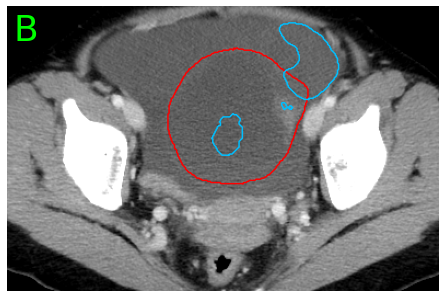

In [4]:
imgs_path = "/scratch/yiang/nnUNet/nnUNet_pred/Task102_CaOvarySeg_HK/imagesTs/"
labs_path = "/scratch/yiang/nnUNet/nnUNet_pred/Task102_CaOvarySeg_HK/labelsTs/"
preds_path = "/scratch/yiang/nnUNet/nnUNet_pred/Task102_CaOvarySeg_HK/op_3d_cascade/"

deltax = 140
deltay = 60
endx = 400
endy = 455

f, ax = plt.subplots()

[img, lab, pre] = get_imgs("DDR794.nii.gz")
slc_ind = 138
lab_rot = np.rot90(lab[:, : ,slc_ind])
pre_rot = np.rot90(pre[:, : ,slc_ind])
contours_lab = measure.find_contours(lab_rot[deltax:endx, deltay:endy])
contours_pre = measure.find_contours(pre_rot[deltax:endx, deltay:endy])

img_tmp = np.rot90(img_standarize(img[:, :, slc_ind]))
img_tmp = img_tmp[deltax:endx, deltay:endy]
ax.imshow(img_tmp, cmap='gray')

for c1 in contours_lab:
    ax.plot(c1[:, 1], c1[:, 0], linewidth=1.5, color='red')
for c2 in contours_pre:
    ax.plot(c2[:, 1], c2[:, 0], linewidth=1.5, color='deepskyblue')
    
plt.axis('off')

plt.gca().set_axis_off()
plt.subplots_adjust(top = 1, bottom = 0, right = 1, left = 0, 
            hspace = 0, wspace = 0)
plt.margins(0,0)

plt.text(5, 30, "B", size=36, color='lime')
save_path = "./Fig5/Fig5B.tiff"
plt.savefig(save_path, dpi=400, bbox_inches='tight', pad_inches = 0)

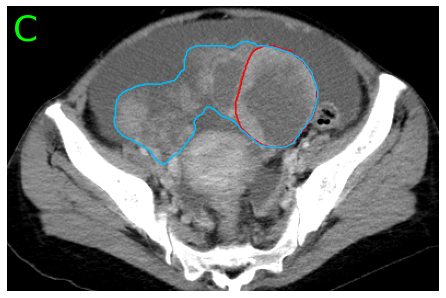

In [2]:
imgs_path = "/scratch/yiang/nnUNet/nnUNet_pred/Task102_CaOvarySeg_HK/imagesTs/"
labs_path = "/scratch/yiang/nnUNet/nnUNet_pred/Task102_CaOvarySeg_HK/labelsTs/"
preds_path = "/scratch/yiang/nnUNet/nnUNet_pred/Task102_CaOvarySeg_HK/op_3d_cascade/"

deltax = 160
deltay = 60
endx = 420
endy = 455

f, ax = plt.subplots()

[img, lab, pre] = get_imgs("DDR618.nii.gz")
slc_ind = 76
lab_rot = np.rot90(lab[:, : ,slc_ind])
pre_rot = np.rot90(pre[:, : ,slc_ind])
contours_lab = measure.find_contours(lab_rot[deltax:endx, deltay:endy])
contours_pre = measure.find_contours(pre_rot[deltax:endx, deltay:endy])

img_tmp = np.rot90(img_standarize(img[:, :, slc_ind]))
img_tmp = img_tmp[deltax:endx, deltay:endy]
ax.imshow(img_tmp, cmap='gray')

for c1 in contours_lab:
    ax.plot(c1[:, 1], c1[:, 0], linewidth=1.5, color='red')
for c2 in contours_pre:
    ax.plot(c2[:, 1], c2[:, 0], linewidth=1.5, color='deepskyblue')
    
plt.axis('off')

plt.gca().set_axis_off()
plt.subplots_adjust(top = 1, bottom = 0, right = 1, left = 0, 
            hspace = 0, wspace = 0)
plt.margins(0,0)

plt.text(5, 30, "C", size=36, color='lime')
save_path = "./Fig5/Fig5C.tiff"
plt.savefig(save_path, dpi=400, bbox_inches='tight', pad_inches = 0)

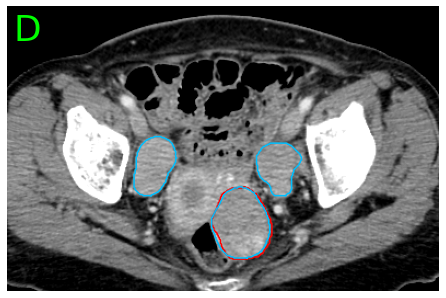

In [3]:
imgs_path = "/scratch/yiang/nnUNet/nnUNet_pred/Task102_CaOvarySeg_HK/imagesTs/"
labs_path = "/scratch/yiang/nnUNet/nnUNet_pred/Task102_CaOvarySeg_HK/labelsTs/"
preds_path = "/scratch/yiang/nnUNet/nnUNet_pred/Task102_CaOvarySeg_HK/op_3d_cascade/"

deltax = 140
deltay = 60
endx = 400
endy = 455

f, ax = plt.subplots()

[img, lab, pre] = get_imgs("PY360.nii.gz")
slc_ind = 20
lab_rot = np.rot90(lab[:, : ,slc_ind])
pre_rot = np.rot90(pre[:, : ,slc_ind])
contours_lab = measure.find_contours(lab_rot[deltax:endx, deltay:endy])
contours_pre = measure.find_contours(pre_rot[deltax:endx, deltay:endy])

img_tmp = np.rot90(img_standarize(img[:, :, slc_ind]))
img_tmp = img_tmp[deltax:endx, deltay:endy]
ax.imshow(img_tmp, cmap='gray')

for c1 in contours_lab:
    ax.plot(c1[:, 1], c1[:, 0], linewidth=1.5, color='red')
for c2 in contours_pre:
    ax.plot(c2[:, 1], c2[:, 0], linewidth=1.5, color='deepskyblue')
    
plt.axis('off')

plt.gca().set_axis_off()
plt.subplots_adjust(top = 1, bottom = 0, right = 1, left = 0, 
            hspace = 0, wspace = 0)
plt.margins(0,0)

plt.text(5, 30, "D", size=36, color='lime')
save_path = "./Fig5/Fig5D.tiff"
plt.savefig(save_path, dpi=400, bbox_inches='tight', pad_inches = 0)

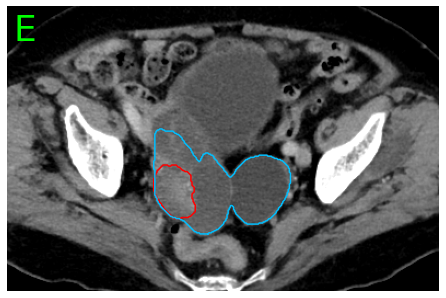

In [4]:
imgs_path = "/scratch/yiang/nnUNet/nnUNet_pred/Task102_CaOvarySeg_HK/imagesTs/"
labs_path = "/scratch/yiang/nnUNet/nnUNet_pred/Task102_CaOvarySeg_HK/labelsTs/"
preds_path = "/scratch/yiang/nnUNet/nnUNet_pred/Task102_CaOvarySeg_HK/op_3d_cascade/"

deltax = 150
deltay = 60
endx = 410
endy = 455

f, ax = plt.subplots()

[img, lab, pre] = get_imgs("PY390.nii.gz")
slc_ind = 18
lab_rot = np.rot90(lab[:, : ,slc_ind])
pre_rot = np.rot90(pre[:, : ,slc_ind])
contours_lab = measure.find_contours(lab_rot[deltax:endx, deltay:endy])
contours_pre = measure.find_contours(pre_rot[deltax:endx, deltay:endy])

img_tmp = np.rot90(img_standarize(img[:, :, slc_ind]))
img_tmp = img_tmp[deltax:endx, deltay:endy]
ax.imshow(img_tmp, cmap='gray')

for c1 in contours_lab:
    ax.plot(c1[:, 1], c1[:, 0], linewidth=1.5, color='red')
for c2 in contours_pre:
    ax.plot(c2[:, 1], c2[:, 0], linewidth=1.5, color='deepskyblue')
    
plt.axis('off')

plt.gca().set_axis_off()
plt.subplots_adjust(top = 1, bottom = 0, right = 1, left = 0, 
            hspace = 0, wspace = 0)
plt.margins(0,0)

plt.text(5, 30, "E", size=36, color='lime')
save_path = "./Fig5/Fig5E.tiff"
plt.savefig(save_path, dpi=400, bbox_inches='tight', pad_inches = 0)

### Fig 5

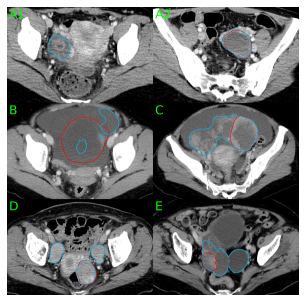

In [5]:
import skimage.io as io

img1_path = './Fig5/Fig5A1.tiff'
img2_path = './Fig5/Fig5A2.tiff'
img3_path = './Fig5/Fig5B.tiff'
img4_path = './Fig5/Fig5C.tiff'
img5_path = './Fig5/Fig5D.tiff'
img6_path = './Fig5/Fig5E.tiff'

im1 = io.imread(img1_path)  
im2 = io.imread(img2_path)
im3 = io.imread(img3_path)
im4 = io.imread(img4_path)
im5 = io.imread(img5_path)
im6 = io.imread(img6_path)

im = np.zeros((1579*3,2400*2,4))
im[:1579, :2400, :] = im1.copy()
im[:1579, 2400:, :] = im2.copy()
im[1579:1579*2, :2400, :] = im3.copy()
im[1579:1579*2, 2400:, :] = im4.copy()
im[1579*2:, :2400, :] = im5.copy()
im[1579*2:, 2400:, :] = im6.copy()
im = np.array(im,dtype=np.uint8)

f, ax = plt.subplots()
ax.imshow(im)

plt.axis('off')
plt.gca().set_axis_off()
plt.subplots_adjust(top = 1, bottom = 0, right = 1, left = 0, 
            hspace = 0, wspace = 0)
plt.margins(0,0)


save_path = "./Fig5/Fig5.tiff"
plt.savefig(save_path, dpi=300, bbox_inches='tight', pad_inches = 0)